# Dataset Description

Greyhound racing victoria (GRV) provides a free API with historical race data. Betwatch API provides historical price data for a small subscription fee. A custom, form based machine learning model was trained on 2020/01/01-2023/01/01 data (track by track). It has 3 features: lane, measure of best 2 of last 5 run times and measure of consistency. It was then used to estimate the probability of each dog winning from 2023 -> current to create the pred_prob_emp column. The column prob_diff = 1/sportsbet_start_price - pred_prob_emp and will be used in betting simulations. Races that included dogs with less than 5 previous races were excluded and so were tracks with less than 1000 previous races in making the 2023 -> current dataset. This dataset is displayed below.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Greyhound_Data.csv')
df = df.drop(columns=['best_bookie_start_price'], errors='ignore')
df['Date'] = pd.to_datetime(df['Date'])
df

,Unnamed: 0,Track,DogName,Date,RaceId,Distance,Win,best_2_last_5_z,consistency_measure,sportsbet_start_price,pred_prob_emp,prob_diff
0,0,launceston,buckle up eli,2023-01-02,857139310,515,0,0.046149,0.363636,3.4,0.134934,0.159184
1,1,angle park,australasian art,2023-01-02,857095189,342,0,0.125558,0.523810,3.8,0.178232,0.084926
2,2,angle park,beautiful bounty,2023-01-02,857095196,342,0,-0.457175,0.310811,35.0,0.150779,-0.122207
3,3,angle park,charlie brother,2023-01-02,857095197,342,0,0.315241,0.088608,4.4,0.233124,-0.005851
4,4,angle park,dasher millane,2023-01-02,857095194,342,0,-0.218921,0.090909,26.0,0.071552,-0.033090
...,...,...,...,...,...,...,...,...,...,...,...,...
510252,510252,richmond,impress luckie,2025-08-13,1191389043,401,0,-0.099600,0.350649,26.0,0.108306,-0.069844
510253,510253,richmond,it's noon,2025-08-13,1191389045,401,0,0.347383,0.076923,6.5,0.131784,0.022062
510254,510254,richmond,kiwi kawa,2025-08-13,1191389043,401,1,0.093469,0.281250,4.4,0.191566,0.035707
510255,510255,richmond,lucia power,2025-08-13,1191389042,401,0,-0.504993,0.142857,71.0,0.020737,-0.006652


#
#
#
#
#
#
#
#
#
#
# Exploratory Data Analysis

In [92]:
#All races only have 1 winner

df.groupby('RaceId')['Win'].sum().value_counts().to_dict()

{1: 70220}

In [93]:
#Check for duplicate values

df = df.drop_duplicates(subset=['Date', 'DogName'])

duplicate_rows = df[df.duplicated(subset=['Date', 'DogName'], keep=False)]

if not duplicate_rows.empty:
    print("There are rows with duplicate Date and DogName values.")
else:
    print("There are no rows with duplicate Date and DogName values.")

There are no rows with duplicate Date and DogName values.


In [94]:
#Check the 'total probability of the sportsbet market' race by race to measure sportsbet commission

grouped = df.groupby(['Track', 'Date', 'RaceId'])

# Calculate the reciprocated sums for each group
reciprocated_sums = grouped['sportsbet_start_price'].apply(lambda x: (1 / x.replace(0, np.nan)).sum()).tolist()

np.mean(reciprocated_sums)

1.2194291283341332

#
#
#
#
#
#
#
#
#
#
# Explore My Win Probability Measure In Comparison To The Market's

In [95]:
# My model's accuracy: % of races where winner is correctly predicted

# Calculate win percentage for the whole dataset
highest_prob_win = df.loc[df.groupby('RaceId')['pred_prob_emp'].idxmax()]
winning_race_id = highest_prob_win[highest_prob_win['Win'] == 1]['RaceId'].unique()
win_percentage = len(winning_race_id) / df['RaceId'].nunique() * 100
print(f"Win percentage for the whole dataset: {win_percentage:.2f}%")

Win percentage for the whole dataset: 33.30%


In [96]:
# Sportsbet accuracy: % of races where winner is correctly predicted

# Calculate win percentage for the whole dataset
highest_prob_win = df.loc[df.groupby('RaceId')['sportsbet_start_price'].idxmin()]
winning_race_id = highest_prob_win[highest_prob_win['Win'] == 1]['RaceId'].unique()
win_percentage = len(winning_race_id) / df['RaceId'].nunique() * 100
print(f"Win percentage for the whole dataset: {win_percentage:.2f}%")

Win percentage for the whole dataset: 41.44%


Win percentage for bin: -0.0167512467998891 = 0.019205895033904283
Win percentage for bin: 0.00795732015331425 = 0.0293967781131188
Win percentage for bin: 0.0273754547495207 = 0.03860776858856269
Win percentage for bin: 0.042076552958614094 = 0.04472229843609141
Win percentage for bin: 0.0548438878248687 = 0.05275741778701054
Win percentage for bin: 0.0666033846633112 = 0.06224521793665726
Win percentage for bin: 0.0779680575849576 = 0.07243366127072473
Win percentage for bin: 0.08888733602896555 = 0.0842707639242739
Win percentage for bin: 0.10014150197040735 = 0.09254105750009799
Win percentage for bin: 0.1114320340977761 = 0.10237917924195508
Win percentage for bin: 0.1233558720346301 = 0.11672938225148949
Win percentage for bin: 0.1363783442437288 = 0.12597499314075178
Win percentage for bin: 0.1498829564347228 = 0.14192764473013758
Win percentage for bin: 0.1652769607599193 = 0.15984008152706464
Win percentage for bin: 0.1830234659113006 = 0.1766942343119194
Win percentage for bi

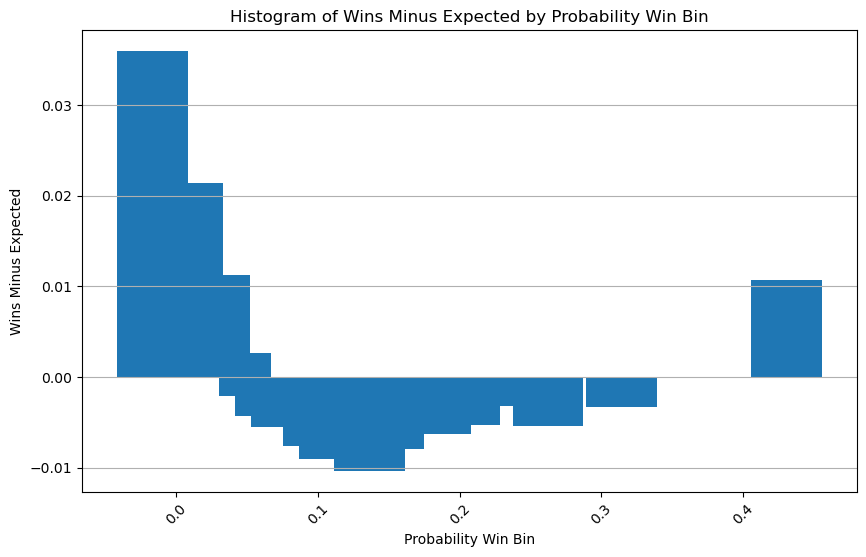

In [97]:
#Comparing how often dogs that my model says are 30% likely to win actually win, same for 33%, 35%...
#i.e. Is my probability measure unbiased
#My model slightly underestimates how likely extreme favourites and extreme outsiders are to win (by about 1% and 3% respectively) but seems empirical overall



prob_win_bins = pd.qcut(df['pred_prob_emp'], q=20)
df['prob_win_bin'] = prob_win_bins.apply(lambda b: df[(df['pred_prob_emp'] >= b.left) & (df['pred_prob_emp'] <= b.right)]['pred_prob_emp'].median())

# Create a dictionary to store dataframes for each unique prob_win_bin
prob_win_bin_dfs = {}

# Iterate over each unique value in prob_win_bin
for bin_value in df['prob_win_bin'].unique():
    # Create a dataframe for each unique prob_win_bin value
    prob_win_bin_dfs[bin_value] = df[df['prob_win_bin'] == bin_value]

wins_minus_expected = {}
for bin in sorted(prob_win_bin_dfs.keys()):
    df_bin = prob_win_bin_dfs[bin]
    win_percentage_bin = (df_bin['Win'].sum() / len(df_bin))
    wins_minus_expected[bin] = win_percentage_bin - bin

    print('Win percentage for bin: '+str(bin)+' = '+str(win_percentage_bin))

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(wins_minus_expected.keys(), wins_minus_expected.values(), width=0.05, align='center')
plt.xlabel('Probability Win Bin')
plt.ylabel('Wins Minus Expected')
plt.title('Histogram of Wins Minus Expected by Probability Win Bin')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()


# Betting Simulation

The model is tested on dogs that are less than $3 (given that higher priced dogs have more commission taken by bookies). The betting condition 0.005 < prob_diff < 0.01 (prob_diff = 1/sportsbet_start_price - pred_prob_emp) seems to turn a profit recently.

ROI Per Bet: 0.06112852664576804
Win Rate: 0.4200626959247649
Bets: 319


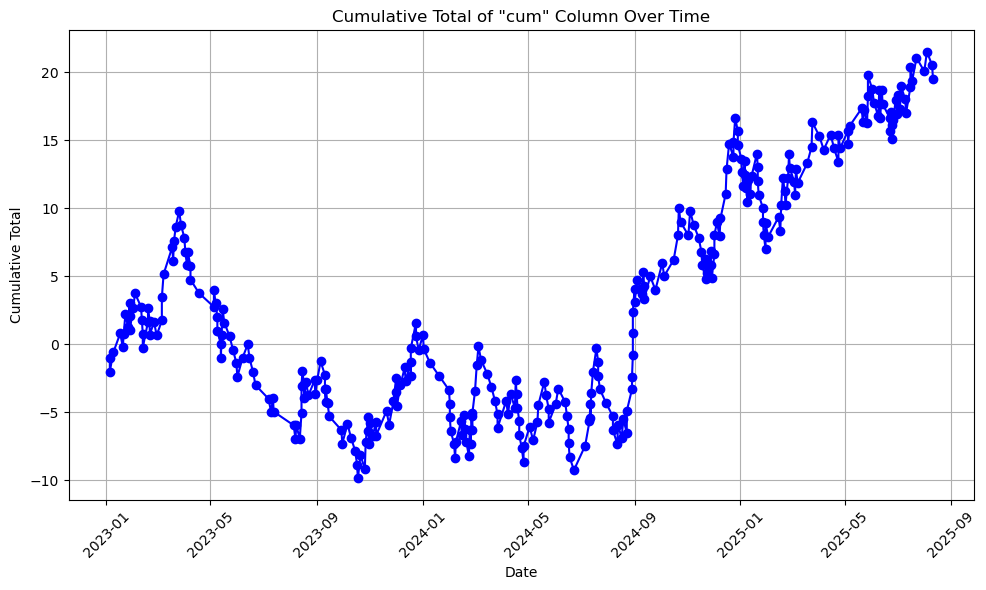

In [100]:
def sim(df, lower_range, upper_range, lower_price, upper_price, plot):
    ranges_analysis_df1 = df[(df['prob_diff']>=lower_range) & (df['prob_diff']<=upper_range) & (df['sportsbet_start_price']<=upper_price) & (df['sportsbet_start_price']>=lower_price)]
    ranges_analysis_df1['cum'] = ranges_analysis_df1.apply(lambda row: row['sportsbet_start_price'] - 1 if row['Win'] == 1 else -1, axis=1)

    # Calculate the cumulative sum of the 'cum' column in ranges_analysis_df1
    ranges_analysis_df1['Cumulative Sum'] = ranges_analysis_df1['cum'].cumsum()

    print('ROI Per Bet: '+str(ranges_analysis_df1.iloc[-1]['Cumulative Sum']/ranges_analysis_df1.shape[0]))
    print('Win Rate: '+str(ranges_analysis_df1[ranges_analysis_df1['Win']==1].shape[0]/ranges_analysis_df1.shape[0]))
    print('Bets: '+str(ranges_analysis_df1.shape[0]))

    if plot:
        # Plot the Date column against the cumulative total of the 'cum' column
        plt.figure(figsize=(10, 6))
        plt.plot(ranges_analysis_df1['Date'], ranges_analysis_df1['Cumulative Sum'], marker='o', linestyle='-', color='b')
        plt.title('Cumulative Total of "cum" Column Over Time')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Total')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        return ranges_analysis_df1

    else:
        return ranges_analysis_df1.iloc[-1]['Cumulative Sum']


(lower_range, upper_range) = (0.005, 0.01)
(lower_price, upper_price) = (1.9, 3)
plot = True

df_final_sim = sim(df, lower_range, upper_range, lower_price, upper_price, plot)


# Results

The model (and betting condition) seem like they had some edge recently given their statistically significant ROI Per Bet. However, putting this betting strategy into practice would be difficult given that it relies on capturing an extremely narrow start price margin.